### Traveltime Computation in a Heterogeneous Marmousi Model

In this noteook, we compute traveltimes for a 2D heterogeneous velocity model based on the Marmousi model. 


In [1]:
using SeisTimes 
using GLMakie 
Makie.inline!(true);

### Create the velocity model 

Grid Shape: (501, 351)


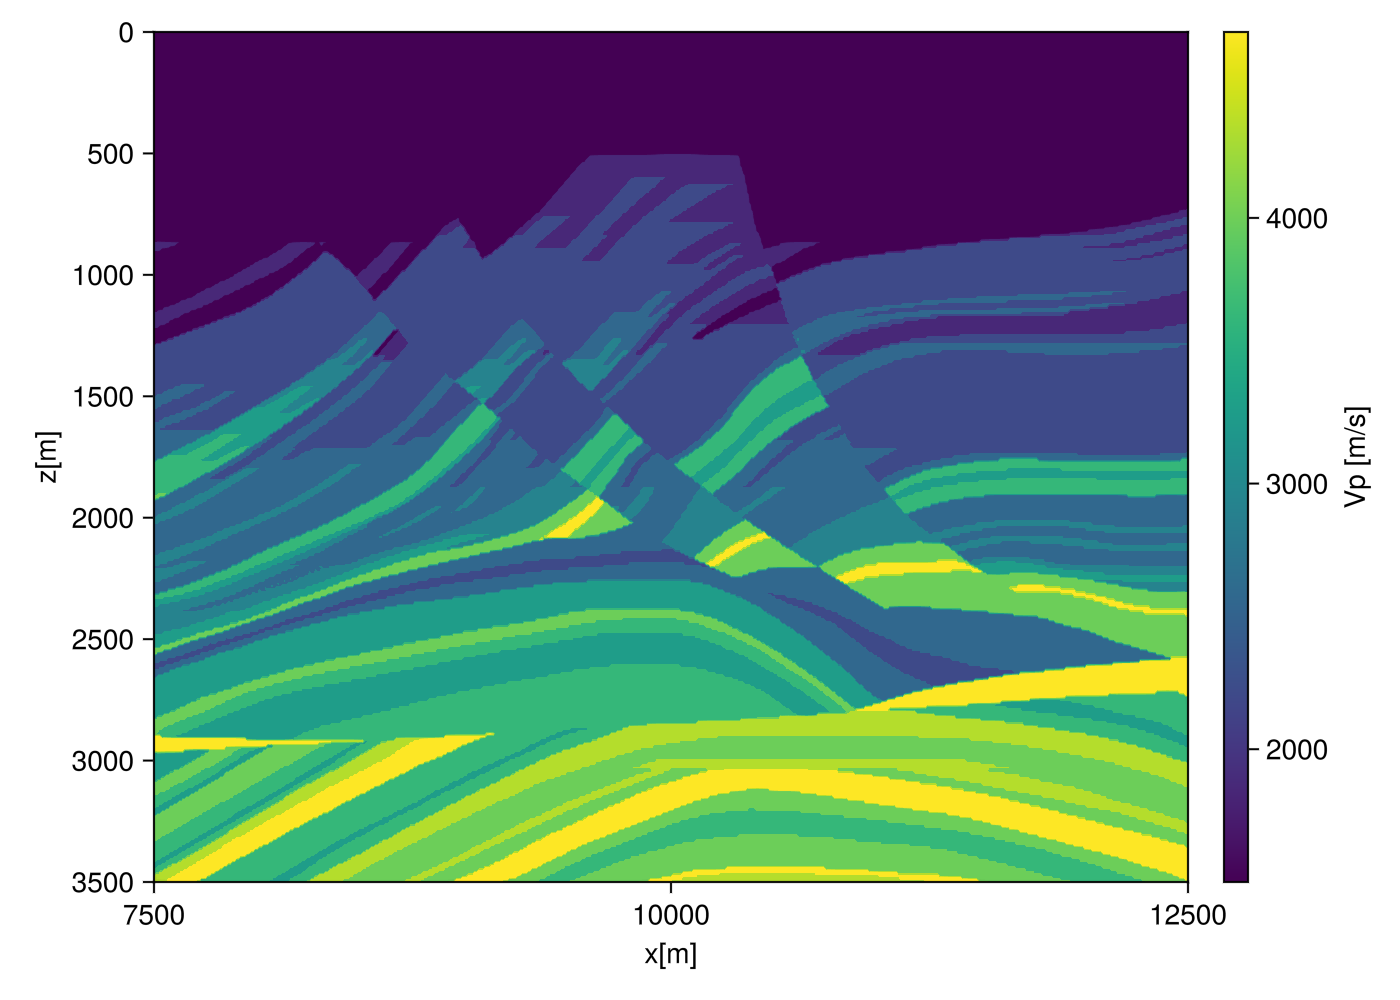

In [2]:
# read data from txt file
filename = joinpath(@__DIR__,"marmousi.txt")
data = []
for line in eachline(filename)
    values = parse.(Float64, split(line))
    push!(data, values)
end
data = transpose(hcat(data...))

x_coords = unique(data[:,1])
z_coords = unique(data[:,2])
vp = reshape(data[:,3], (length(x_coords), length(z_coords)))

# resample into a more coarse grid
nstep = 2
x_coords = x_coords[begin:nstep:end]
z_coords = z_coords[begin:nstep:end]
vp = vp[begin:nstep:end, begin:nstep:end]
vs = similar(vp) .= vp ./ sqrt(3)

println("Grid Shape: ", size(vp))

fig = Figure(size=(700,500)) 
ax = Axis(fig[1,1], yreversed=true, xlabel="x[m]", ylabel="z[m]")
contourf!(ax, x_coords, z_coords, vp)
Colorbar(fig[1,2], label="Vp [m/s]", limits=(minimum(vp), maximum(vp)))
fig

### Compute P-wave travel times for a source

In [3]:
# create a Solid2D instance 
solid = Solid2D(x_coords, z_coords, vp, vs);

# define source(s) location(s)
sources = [(10000, 0)]

# Compute traveltime 
# Note: Convergence speed is influenced by:
#   • Grid resolution (number of points)
#   • Model heterogeneity 

tt_p = fast_sweep(solid, sources, :P, :LxFS5, max_iter=2000, max_error_tol=1e-5, verbose=true, viscosity_buffer=5);

Compute Traveltimes: P
Grid Size: 501, 351
Viscosities: 5.00e+00 | 5.00e+00 
Iter:     1 | L2: 1.00000e+10 | L∞: 1.00000e+10
Iter:     2 | L2: 4.00444e+10 | L∞: 1.00000e+10
Iter:     3 | L2: 5.05274e+09 | L∞: 1.70630e+09
Iter:     4 | L2: 5.23683e+09 | L∞: 1.44302e+09
Iter:     5 | L2: 5.41403e+09 | L∞: 1.30505e+09
Iter:     6 | L2: 5.70375e+09 | L∞: 1.17066e+09
Iter:     7 | L2: 6.12157e+09 | L∞: 1.12077e+09
Iter:     8 | L2: 6.68702e+09 | L∞: 1.02104e+09
Iter:     9 | L2: 7.48746e+09 | L∞: 1.04513e+09
Iter:    10 | L2: 8.12710e+09 | L∞: 1.01891e+09
Iter:    11 | L2: 8.47914e+09 | L∞: 9.48793e+08
Iter:    12 | L2: 8.69729e+09 | L∞: 8.69155e+08
Iter:    13 | L2: 8.93842e+09 | L∞: 8.50289e+08
Iter:    14 | L2: 9.01230e+09 | L∞: 8.25445e+08
Iter:    15 | L2: 9.08397e+09 | L∞: 7.47901e+08
Iter:    16 | L2: 9.10766e+09 | L∞: 6.82124e+08
Iter:    17 | L2: 9.19582e+09 | L∞: 6.98477e+08
Iter:    18 | L2: 9.26113e+09 | L∞: 6.66656e+08
Iter:    19 | L2: 9.31802e+09 | L∞: 5.88503e+08
Iter:    20

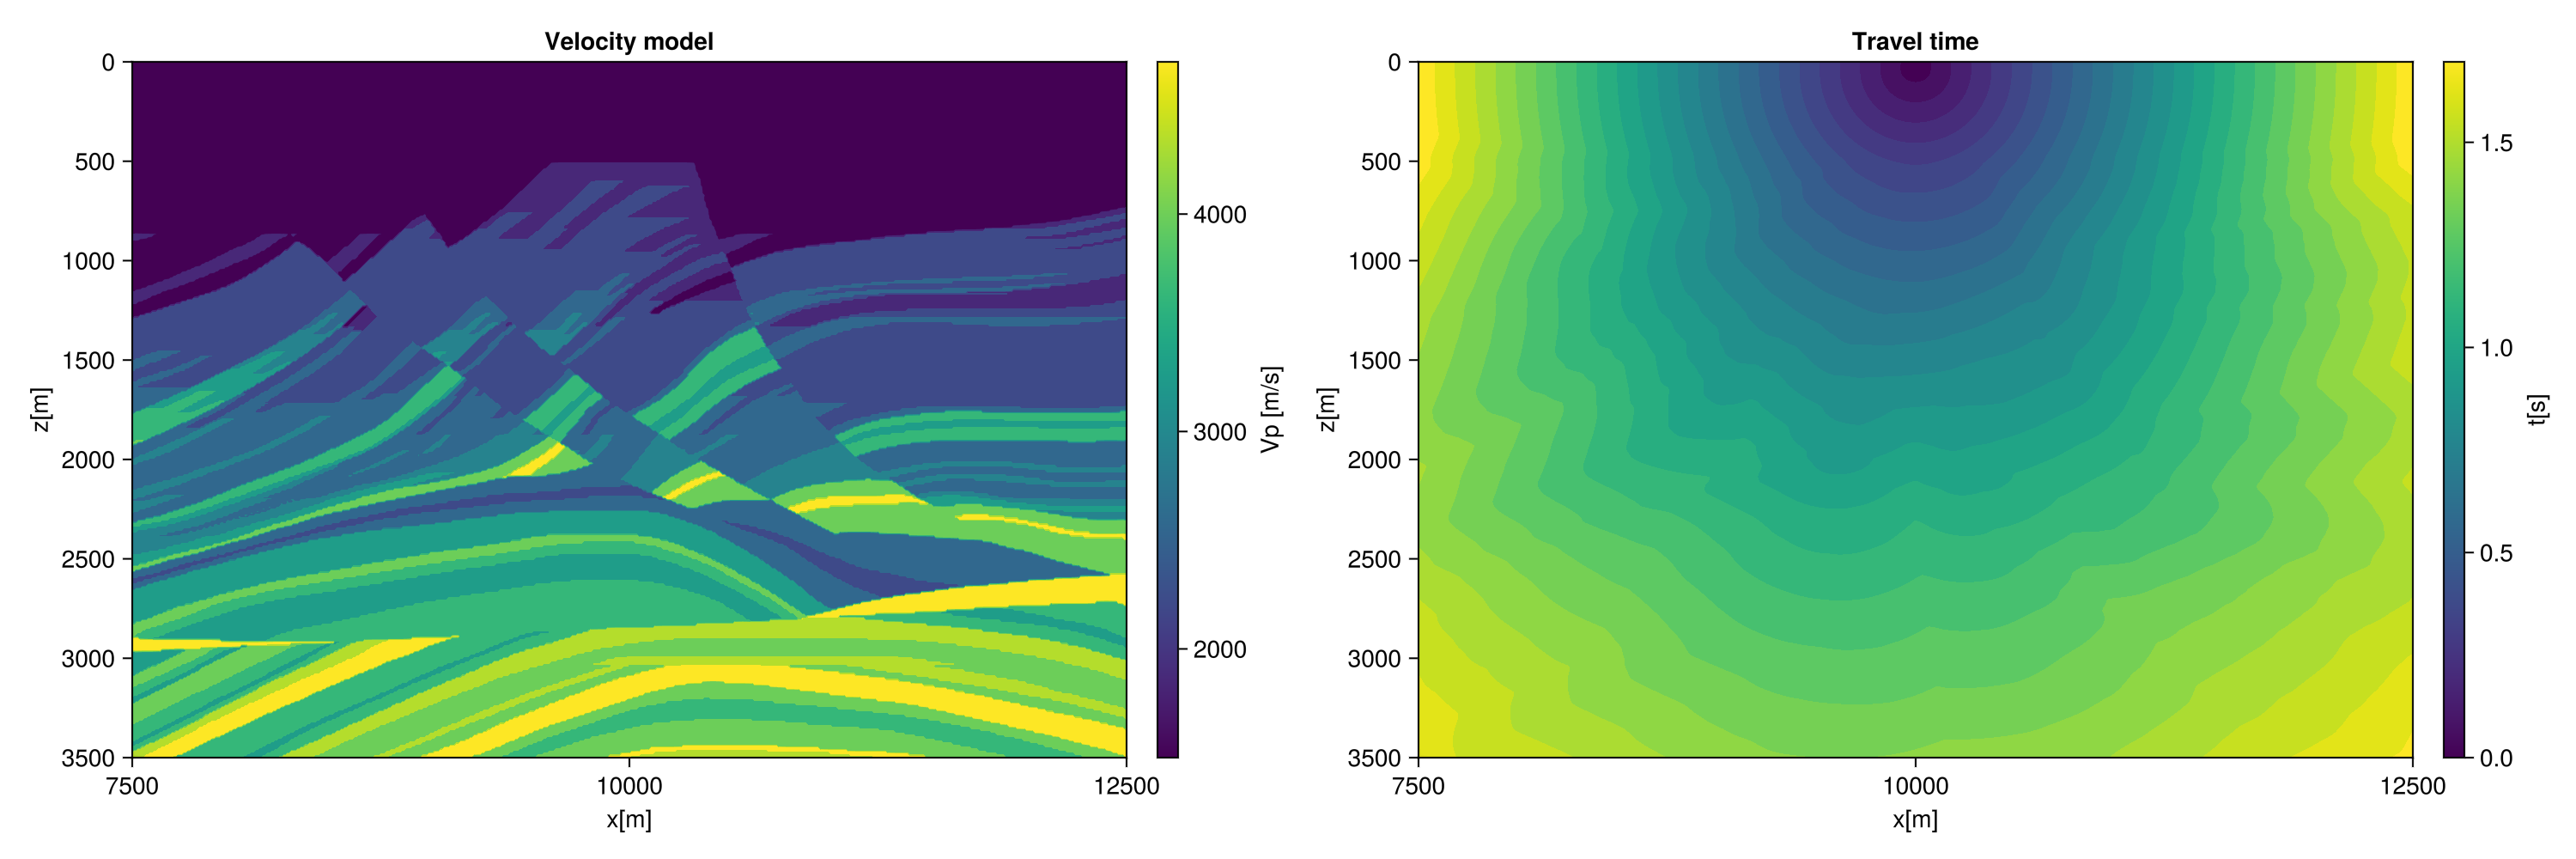

In [5]:
# Visualize travel time grid 

fig = Figure(size=(1500,500)) 

ax = Axis(fig[1,1], yreversed=true, xlabel="x[m]", ylabel="z[m]", title="Velocity model")
contourf!(ax, x_coords, z_coords, vp)
Colorbar(fig[1,2], label="Vp [m/s]", limits=(minimum(vp), maximum(vp)))

ax = Axis(fig[1,3], yreversed=true, xlabel="x[m]", ylabel="z[m]", title="Travel time")
contourf!(ax, x_coords, z_coords, tt_p, levels=25)
Colorbar(fig[1,4], label="t[s]", limits=(minimum(tt_p), maximum(tt_p)))

fig